In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cooler
import lavaburst
import seaborn as sns
import matplotlib.pyplot as plt

/home/dmitry/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Example usage of some callers

In [3]:
import TADcalling
TADcalling.logger.setLevel('INFO')

In [4]:
from TADcalling import CallerClasses, DataClasses

In [3]:
IS = TADcalling.CallerClasses.InsulationCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [4]:
IS.call({'window':np.arange(2e4,2e5,2e4), 'cutoff':[0.1, 0.2, 0.5, 0.7]})

In [5]:
DI = TADcalling.CallerClasses.DirectionalityCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [6]:
DI.call({'window':np.arange(2e4,2e5,2e4), 'cutoff':[0.1, 0.2, 0.5, 0.7]})

In [4]:
lc = TADcalling.CallerClasses.LavaburstCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [5]:
lc.call({'gamma':np.arange(-5,5.1,0.1), 'method':['armatus', 'modularity']})

In [6]:
lc._segmentations

{'S2': {(-5.0, 'armatus'): 0	677	1
  677	682	1
  682	1151	1, (-5.0, 'modularity'): 0	1151	1, (-4.9, 'armatus'): 0	676	1
  676	687	1
  687	1151	1, (-4.9, 'modularity'): 0	1151	1, (-4.800000000000001,
   'armatus'): 0	674	1
  674	691	1
  691	1151	1, (-4.800000000000001,
   'modularity'): 0	1151	1, (-4.700000000000001, 'armatus'): 0	673	1
  673	696	1
  696	1151	1, (-4.700000000000001,
   'modularity'): 0	1151	1, (-4.600000000000001, 'armatus'): 0	671	1
  671	701	1
  701	1151	1, (-4.600000000000001,
   'modularity'): 0	1151	1, (-4.500000000000002, 'armatus'): 0	670	1
  670	705	1
  705	1151	1, (-4.500000000000002,
   'modularity'): 0	1151	1, (-4.400000000000002, 'armatus'): 0	669	1
  669	710	1
  710	1151	1, (-4.400000000000002,
   'modularity'): 0	1151	1, (-4.3000000000000025, 'armatus'): 0	668	1
  668	714	1
  714	1151	1, (-4.3000000000000025,
   'modularity'): 0	1151	1, (-4.200000000000003, 'armatus'): 0	666	1
  666	714	1
  714	719	1
  719	1151	1, (-4.200000000000003,
   'modularity'): 0	1

In [7]:
la = TADcalling.CallerClasses.LavaArmatusCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [8]:
la.call({'gamma':np.arange(-5,5.1,0.1)})

In [9]:
la._segmentations

{'S2': {-5.0: 0	677	1
  677	682	1
  682	1151	1, -4.9: 0	676	1
  676	687	1
  687	1151	1, -4.800000000000001: 0	674	1
  674	691	1
  691	1151	1, -4.700000000000001: 0	673	1
  673	696	1
  696	1151	1, -4.600000000000001: 0	671	1
  671	701	1
  701	1151	1, -4.500000000000002: 0	670	1
  670	705	1
  705	1151	1, -4.400000000000002: 0	669	1
  669	710	1
  710	1151	1, -4.3000000000000025: 0	668	1
  668	714	1
  714	1151	1, -4.200000000000003: 0	666	1
  666	714	1
  714	719	1
  719	1151	1, -4.100000000000003: 0	663	1
  664	714	1
  714	724	1
  724	1151	1, -4.0000000000000036: 0	664	1
  664	714	1
  714	728	1
  728	1151	1, -3.900000000000004: 0	660	1
  664	714	1
  714	733	1
  733	1151	1, -3.8000000000000043: 0	659	1
  659	663	1
  664	714	1
  714	737	1
  737	1151	1, -3.7000000000000046: 0	4	1
  4	663	1
  664	714	1
  714	742	1
  742	1151	1, -3.600000000000005: 0	5	1
  5	663	1
  664	714	1
  714	747	1
  747	1151	1, -3.5000000000000053: 0	6	1
  6	663	1
  664	713	1
  713	752	1
  752	1151	1, -3.4000000000000057

In [7]:
acpp = TADcalling.CallerClasses.ArmatusCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [8]:
acpp.call({'gamma':[i / 10 for i in range(-10, 11)]}, caller_path='armatus')

INFO:TADcalling:Converting file: ../data/S2.20000.cool from cool to txt.gz
INFO:TADcalling:gzip ../data/S2.20000.chr2L.txt
INFO:TADcalling:Check stdout: b''
INFO:TADcalling:Stderr is not empty. Might be an error in call_and_check_errors for the command: gzip ../data/S2.20000.chr2L.txt
INFO:TADcalling:Check stderr: b'gzip: ../data/S2.20000.chr2L.txt.gz already exists;\tnot overwritten\n'
INFO:TADcalling:Command completed: 0.557170
INFO:TADcalling:armatus -i ../data/S2.20000.chr2L.txt.gz -g -1.0 -j -o buff -r 1
INFO:TADcalling:Check stdout: b'OPTIMAL SCORE: 107645\n'
INFO:TADcalling:Stderr is not empty. Might be an error in call_and_check_errors for the command: armatus -i ../data/S2.20000.chr2L.txt.gz -g -1.0 -j -o buff -r 1
INFO:TADcalling:Check stderr: b'Reading input from ../data/S2.20000.chr2L.txt.gz.\nN/A at resolution 1bp\nline 1000\nMatrixParser read matrix of size: 1151 x 1151\ngamma=-1\nbegin computeTopK()\nIn topK()\nThe 0th-best solution had score 107645\nDomain ensemble size

INFO:TADcalling:Command completed: 1.377929
INFO:TADcalling:armatus -i ../data/S2.20000.chr2L.txt.gz -g 0.2 -j -o buff -r 1
INFO:TADcalling:Check stdout: b'OPTIMAL SCORE: 408.906\n'
INFO:TADcalling:Stderr is not empty. Might be an error in call_and_check_errors for the command: armatus -i ../data/S2.20000.chr2L.txt.gz -g 0.2 -j -o buff -r 1
INFO:TADcalling:Check stderr: b'Reading input from ../data/S2.20000.chr2L.txt.gz.\nN/A at resolution 1bp\nline 1000\nMatrixParser read matrix of size: 1151 x 1151\ngamma=0.2\nbegin computeTopK()\nIn topK()\nThe 0th-best solution had score 408.906\nDomain ensemble size: 1\nWriting consensus domains to: buff.consensus.txt\n'
INFO:TADcalling:Command completed: 1.409668
INFO:TADcalling:armatus -i ../data/S2.20000.chr2L.txt.gz -g 0.3 -j -o buff -r 1
INFO:TADcalling:Check stdout: b'OPTIMAL SCORE: 380.409\n'
INFO:TADcalling:Stderr is not empty. Might be an error in call_and_check_errors for the command: armatus -i ../data/S2.20000.chr2L.txt.gz -g 0.3 -j -o

In [9]:
acpp._segmentations

{'S2': {-1.0: 0	727	1
  755	760	1
  772	776	1
  816	836	1
  873	877	1
  906	1050	1
  1116	1137	1, -0.9: 0	727	1
  755	760	1
  772	776	1
  816	836	1
  906	1050	1
  1116	1137	1, -0.8: 0	727	1
  755	760	1
  772	776	1
  816	836	1
  906	1050	1
  1116	1137	1, -0.7: 0	727	1
  772	776	1
  816	836	1
  906	1050	1
  1116	1137	1, -0.6: 5	14	1
  26	727	1
  816	833	1
  906	1050	1
  1116	1137	1, -0.5: 5	14	1
  26	727	1
  816	833	1
  906	1050	1
  1116	1137	1, -0.4: 6	14	1
  26	716	1
  816	833	1
  906	1050	1
  1116	1137	1, -0.3: 6	14	1
  26	400	1
  483	489	1
  536	542	1
  598	645	1
  658	662	1
  682	716	1
  816	833	1
  900	907	1
  937	941	1
  968	1050	1
  1116	1127	1, -0.2: 6	14	1
  26	349	1
  483	489	1
  536	542	1
  598	645	1
  658	662	1
  682	707	1
  816	821	1
  831	836	1
  900	907	1
  937	941	1
  968	978	1
  994	1007	1
  1014	1021	1
  1033	1038	1
  1116	1127	1, -0.1: 26	224	1
  248	253	1
  483	489	1
  536	542	1
  598	604	1
  623	627	1
  682	686	1
  690	694	1
  816	821	1
  902	907	1
  968	977	1
  103

In [7]:
df_acpp = acpp.segmentation2df()

gamma -0.9
gamma -0.8
gamma 0.0
gamma -0.1
gamma -0.6
gamma -0.2
gamma -1.0
gamma -0.7
gamma -0.3
gamma -0.4
gamma -0.5


In [8]:
df_lc = lc.segmentation2df()

gamma -3.300000000000006
method modularity
gamma -2.500000000000009
method modularity
gamma 5.199999999999964
method modularity
gamma -2.3000000000000096
method armatus
gamma -0.3000000000000167
method armatus
gamma -1.4000000000000128
method armatus
gamma -1.0000000000000142
method modularity
gamma -4.9
method modularity
gamma 3.699999999999969
method modularity
gamma -0.10000000000001741
method modularity
gamma -1.4000000000000128
method modularity
gamma 1.499999999999977
method armatus
gamma 0.09999999999998188
method modularity
gamma -2.1000000000000103
method modularity
gamma -0.7000000000000153
method modularity
gamma -3.1000000000000068
method modularity
gamma 2.4999999999999734
method modularity
gamma 3.39999999999997
method modularity
gamma 1.9999999999999751
method modularity
gamma 0.49999999999998046
method modularity
gamma -0.3000000000000167
method modularity
gamma -4.700000000000001
method armatus
gamma 1.0999999999999783
method modularity
gamma 1.8999999999999755
method 

In [27]:
df_acpp.head()

,bgn,caller,end,gamma,label
0,0,Armatus,727,-0.9,S2
1,755,Armatus,760,-0.9,S2
2,772,Armatus,776,-0.9,S2
3,816,Armatus,836,-0.9,S2
4,906,Armatus,1050,-0.9,S2


In [22]:
armatus_mask = df_lc.loc[:, 'method'] == 'armatus'

In [26]:
df = pd.concat([df_lc[armatus_mask], df_acpp])

In [38]:
df.head()

,bgn,caller,end,gamma,label,method,length
0,0,Lavaburst,17,-2.3,S2,armatus,17
1,18,Lavaburst,660,-2.3,S2,armatus,642
2,664,Lavaburst,711,-2.3,S2,armatus,47
3,711,Lavaburst,820,-2.3,S2,armatus,109
4,820,Lavaburst,1151,-2.3,S2,armatus,331


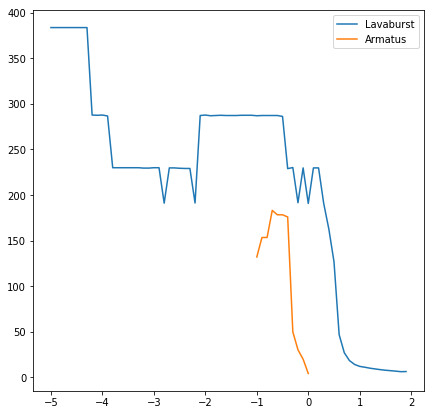

In [37]:
df.loc[:,'length'] = df.end-df.bgn
gr = df.groupby(['gamma', 'caller']).mean().reset_index().sort_values(['caller', 'gamma'])
plt.figure(figsize=[7,7])
for caller in ['Lavaburst', 'Armatus']:
    tmp = gr.query('caller=="{}"'.format(caller))
    plt.plot( tmp.gamma, tmp.length, label=caller)
    
plt.legend()

In [12]:
df_lc = lc.segmentation2df()
df_is = IS.segmentation2df()
df_di = DI.segmentation2df()

df = pd.concat([x.segmentation2df() for x in [lc, IS, DI]])

In [10]:
df[0:5]

,bgn,caller,end,gamma,label,method
0,0,Lavaburst,1151,-3.3,S2,modularity
0,0,Lavaburst,1151,-2.5,S2,modularity
0,0,Lavaburst,15,5.2,S2,modularity
1,21,Lavaburst,28,5.2,S2,modularity
2,28,Lavaburst,43,5.2,S2,modularity


In [25]:
df.loc[:,'length'] = df.end-df.bgn

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


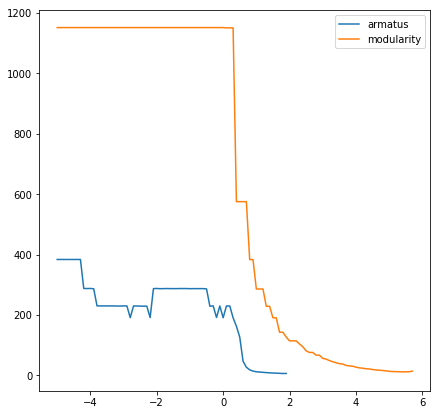

In [12]:
gr = df.query('caller=="Lavaburst"').groupby(['gamma', 'method']).mean().reset_index().sort_values(['method', 'gamma'])
plt.figure(figsize=[7,7])
for method in ['armatus', 'modularity']:
    tmp = gr.query('method=="{}"'.format(method))
    plt.plot( tmp.gamma, tmp.length, label=method )
    
plt.legend()

In [21]:
hc = TADcalling.CallerClasses.HiCsegCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [22]:
hc.call(params_dict={'distr_model':["P"]}, tune=True)

INFO:TADcalling:Converting file: ../data/S2.20000.cool from cool to txt
INFO:TADcalling:Rscript hicseg_script.R
INFO:TADcalling:Check stdout: b''


In [23]:
df_hc = hc.segmentation2df()

In [6]:
lc.convert_files("txt.gz")

In [18]:
lc._metadata

{'assembly': 'dm3',
 'balance': False,
 'chr': 'chr2L',
 'data_formats': ['cool', 'txt.gz', 'txt.gz'],
 'files_cool': ['./data/S2.20000.cool'],
 'files_txt.gz': ['./data/S2.20000.chr2L.txt.gz'],
 'labels': ['S2'],
 'resolution': 1000,
 'size': 0}

### DEVELOPMENT OF MrTADFinder

In [3]:
mrc = TADcalling.CallerClasses.MrTADFinderCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [5]:
mrc._metadata

{'assembly': 'dm3',
 'balance': True,
 'chr': 'chr2L',
 'data_formats': ['cool', 'mr_sparse'],
 'files_cool': ['../data/S2.20000.cool'],
 'files_mr_sparse': ['../data/S2.20000.chr2L.sparse.txt'],
 'labels': ['S2'],
 'method': 'Base',
 'params': ['params'],
 'resolution': 20000,
 'size': 0}

In [4]:
mrc.call(1, caller_path='../../MrTADFinder/run_MrTADFinder.jl')

INFO:TADcalling:Converting file: ../data/S2.20000.cool from cool to mr_sparse
INFO:TADcalling:julia ../../MrTADFinder/run_MrTADFinder.jl ../data/S2.20000.chr2L.mr_sparse.txt ../data/S2.20000.chr2L.genome_bin.txt ../data/S2.20000.chr2L.all_bins.txt res=20000 1 buff_mrtadfinder.txt
INFO:TADcalling:Check stdout: b'reading binning information\nreading contact map\nestimating the null model\n398.3238427492396\n229.27585114370873\n142.36827101337013\n88.71300427935282\n58.39096542067618\n38.57713413983011\n26.35065661061504\n18.07528065734837\n12.62906744004556\n8.79511025237405\n6.1510435625324416\n4.295955370547412\n3.0066273050968713\n2.1030581237775223\n1.472783214460475\n1.0314987152252546\n0.7229065817728486\n0.5066416804314664\n0.35517350369225326\n0.24899976863201537\n0.17459562212552057\n0.12243065205879244\n0.0858608573350988\n0.06021696197657942\n0.04223382614474887\n0.029621239714066744\n0.020775651860515408\n0.014574744628451989\n0.01022547391153968\n0.007174496798614624\n0.0050

FileNotFoundError: File b'buff_mrtadfinder.txt' does not exist

In [3]:
c = cooler.Cooler('./data/S2.20000.cool')

In [4]:
sparse = c.matrix(balance=True, as_pixels=True).fetch('chr2L')

In [5]:
sparse.loc[:, "bin1_id":"bin2_id"] += 1

In [6]:
sparse

,bin1_id,bin2_id,count,balanced
0,1,1,2859,0.892852
1,1,2,382,0.117808
2,1,3,315,0.076218
3,1,4,251,0.051895
4,1,5,109,0.026401
5,1,6,61,0.018097
6,1,7,53,0.019344
7,1,8,39,0.013315
8,1,9,16,0.005216
9,1,10,34,0.009732


In [7]:
sparse.loc[:, 'bin1_id':'count'].to_csv('test_sparse.txt', header=False, index=False, sep='\t')

In [61]:
max_bin = sparse.loc[:, 'bin1_id':'bin2_id'].max().max()

In [77]:
with open("genome_bin.txt", 'w') as outfile:
    outfile.write("1\tchr1\t0\t{}".format(max_bin - 1))

In [79]:
max_bin

1151

In [80]:
with open('chr_bin.txt', 'w') as outfile:
    for i in range(max_bin):
        outfile.write("0\t{}\t{}\n".format(i * 20000 + 1, (i + 1) * 20000))

In [12]:
subprocess.run("julia ../MrTADFinder/run_MrTADFinder.jl test_sparse.txt genome_bin.txt chr_bin.txt res=20000 1 test_mrtadfinder.txt", shell=True)

CompletedProcess(args='julia ../MrTADFinder/run_MrTADFinder.jl test_sparse.txt genome_bin.txt chr_bin.txt res=20000 1 test_mrtadfinder.txt', returncode=1)

In [13]:
mr_df = pd.read_csv('test_mrtadfinder.csv')

In [17]:
mr_df.loc[:, "domain_st_bin":"domain_ed_bin"].values

array([[42015, 42018],
       [42019, 42035],
       [42036, 42041],
       [42042, 42042],
       [42043, 42043],
       [42044, 42044],
       [42045, 42045],
       [42046, 42046],
       [42047, 42047]])

### Format conversions test


In [15]:
import TADcalling
IS = TADcalling.CallerClasses.InsulationCaller(['S2'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L')

In [ ]:
IS.convert_files('hic', juicer_path='../juicer_tools.1.8.9_jcuda.0.8.jar', remove_intermediary_files=False)

In [ ]:
IS.convert_files('h5')

### Development of Experiment class

In [253]:
from itertools import product, chain
from copy import deepcopy
from collections import Iterable


class Experiment(object):

    def __init__(self, datasets_labels, datasets_files, data_format, callername, track_file=None, **kwargs):

        caller_dict = {'armatus': CallerClasses.ArmatusCaller,
                       'lavaburst': CallerClasses.LavaburstCaller,
                       'lavaarmatus': CallerClasses.LavaArmatusCaller,
                       'lavamodularity': CallerClasses.LavaModularityCaller,
                       'lavavariance': CallerClasses.LavaVarianceCaller,
                       'lavacorner': CallerClasses.LavaCornerCaller,
                       'insulation': CallerClasses.InsulationCaller,
                       'directionality': CallerClasses.DirectionalityCaller,
                       'hicseg': CallerClasses.HiCsegCaller,
                       'mrtadfinder': CallerClasses.MrTADFinderCaller,
                       'hicexplorer': CallerClasses.HiCExplorerCaller}

        mode = kwargs.get('mode', 'iterative')
        back_method = kwargs.get('back_method', 'size')
        optimization = kwargs.get('optimization', 'convergence')

        if mode not in ('iterative', 'user'):
            raise Exception("Mode not understood: %s" % mode)
        self.mode = mode

        if back_method not in ('size', 'dispersion'):
            raise Exception("Background method not understood: %s" % back_method)
        else:
            self.back_method = back_method

        if optimization not in ('convergence', 'simulated', 'border_events'):
            raise Exception("Optimization method not understood: %s" % optimization)
        else:
            self.optimization = optimization

        if callername not in caller_dict.keys():
            raise Exception("Caller not understood: %s" % caller)
        else:
            self.caller = caller_dict[callername](datasets_labels, datasets_files, data_format, **kwargs)
            self.callername = callername

        if track_file:
            self.track = DataClasses.load_BED(track_file)[self.caller._metadata['chr']]

        self.default_ranges = {'armatus': pd.Series([np.arange(-5, 5.5, 0.5)], index=['gamma']),
                       'lavaburst': pd.Series([np.arange(-5, 5.5, 0.5)], index=['gamma']),
                       'lavaarmatus': pd.Series([np.arange(-5, 5.5, 0.5)], index=['gamma']),
                       'lavavariance': pd.Series([np.arange(-5, 5.5, 0.5)], index=['gamma']),
                       'lavacorner': pd.Series([np.arange(-5, 5.5, 0.5)], index=['gamma']),
                       'lavamodularity': pd.Series([np.arange(-5, 5.5, 0.5)], index=['gamma']),
                       'insulation': pd.Series([np.arange(1,11,1) * self.caller._metadata['resolution'],
                                                [0.1, 0.2, 0.5, 0.7]], index=['window', 'cutoff']),
                       'directionality': pd.Series([np.arange(1,11,1) * self.caller._metadata['resolution'],
                                                    [0.1, 0.2, 0.5, 0.7]], index=['window', 'cutoff']),
                       'hicseg': None,
                       'mrtadfinder': None,
                       'hicexplorer': None}

        self.newrange = deepcopy(self.default_ranges[self.callername]) # current range of gammas
        self.oldrange = pd.Series() # previous range of gammas
        self.ranges = {1: deepcopy(self.newrange)} # dict for ranges
        self.iteration = 1 # iterations start with 1
        self.optimization_data = pd.DataFrame() # handles TPR, FDR, JI, OC...
        self.back_data = pd.DataFrame() # handles mean size or dispersions

        # min and max mean size of TADs in bins, user is able to redefine them.
        self.profile = {'size': [2, 100],
                        'dispersion': [0.05, 0.95]}

    def back_calc(self, back_method='size'):
        """
        Calculates background function: mean size of TADs or
        dispersion of sizes for each segmentation.
        """        
        if not self.newrange is None:
            if self.newrange.shape[0] == 1:
                gamma_lookup = list(deepcopy(self.newrange[0]))
            else:
                gamma_lookup = list(product(*self.newrange))
            length_arr = [[self.caller._segmentations[label][gamma].data[:, 1] - self.caller._segmentations[label][gamma].data[:, 0]
                          for gamma in gamma_lookup] for label in self.caller._metadata['labels']]
        else:
            length_arr = [[self.caller._segmentations[label].data[:, 1] - self.caller._segmentations[label].data[:, 0]]
                          for label in self.caller._metadata['labels']]
            gamma_lookup = None
        if back_method == 'size':
            return np.array([[np.mean(i) for i in label_arr] for label_arr in length_arr]), gamma_lookup
        elif back_method == 'dispersion':
            return np.array([[np.std(i) for i in label_arr] for label_arr in length_arr]), gamma_lookup
        else:
            raise Exception("Background method not understood: %s" % back_method)

    def optimized_calc(self, **kwargs):
        """
        Calculates function to be optimized: TPRs and FDRs for
        simulated segmentations, convergence between two replica
        or p-values of distances to the closest genome features based
        on track file.
        """
        optimization = kwargs.get('optimization', self.optimization)
        if not self.newrange is None:
            if self.newrange.shape[0] == 1:
                gamma_lookup = list(deepcopy(self.newrange[0]))
            else:
                gamma_lookup = list(product(*self.newrange))
            seg_arr = [[self.caller._segmentations[label][gamma]
                        for gamma in gamma_lookup] for label in self.caller._metadata['labels']]
        else:
            seg_arr = [[self.caller._segmentations[label]] for label in self.caller._metadata['labels']]

        if optimization == 'simulated':
            TPR_TADs = [[segmentation.count_coef(self.track, coef="TPR TADs")
                         for segmentation in label_arr] for label_arr in seg_arr]
            FDR_TADs = [[segmentation.count_coef(self.track, coef="FDR TADs")
                         for segmentation in label_arr] for label_arr in seg_arr]
            TPR_boundaries = [[segmentation.count_coef(self.track, coef="TPR boundaries")
                               for segmentation in label_arr] for label_arr in seg_arr]
            FDR_boundaries = [[segmentation.count_coef(self.track, coef="FDR boundaries")
                               for segmentation in label_arr] for label_arr in seg_arr]
            return list(map(np.array, (TPR_TADs, FDR_TADs, TPR_boundaries, FDR_boundaries)))

        elif optimization == 'convergence':
            label_rep1 = list(filter(lambda i: "rep1" in i, self.caller._metadata['labels']))[0]
            label_rep2 = list(filter(lambda i: "rep2" in i, self.caller._metadata['labels']))[0]
            if not self.newrange is None:
                seg_rep1 = [self.caller._segmentations[label_rep1][gamma] for gamma in gamma_lookup]
                seg_rep2 = [self.caller._segmentations[label_rep2][gamma] for gamma in gamma_lookup]
            else:
                seg_rep1 = [self.caller._segmentations[label_rep1]]
                seg_rep2 = [self.caller._segmentations[label_rep2]]
            JI_TADs = [seg_rep1[i].count_coef(seg_rep2[i], coef="JI TADs") for i in range(len(seg_rep1))]
            OC_TADs = [seg_rep1[i].count_coef(seg_rep2[i], coef="OC TADs") for i in range(len(seg_rep1))]
            JI_boundaries = [seg_rep1[i].count_coef(seg_rep2[i], coef="JI boundaries") for i in range(len(seg_rep1))]
            OC_boundaries = [seg_rep1[i].count_coef(seg_rep2[i], coef="OC boundaries") for i in range(len(seg_rep1))]
            return list(map(np.array, (JI_TADs, OC_TADs, JI_boundaries, OC_boundaries)))

        elif optimization == 'border_events':
            distances = [segmentation.dist_closest(self.track, mode='bin-boundariwise').flatten()
                         for segmentation in seg_arr]
            #return 1 - p-values
        else:
            raise Exception("Optimization method not understood: %s" % optimization)

    @staticmethod
    def max_coord(target_arr, back_arr, mask_list):
        """
        Find coordinates of maximum values in target_arr
        based on mask from back_arr values.
        """
        if target_arr.shape != back_arr.shape:
            raise Exception("Target and background arrays are not of the same shape: {} vs {}".format(target_arr.shape, back_arr.shape))
        mask = (back_arr <= mask_list[0]) | (back_arr >= mask_list[1])
        v1 = target_arr.copy()
        v1[mask] = np.min(v1)
        return np.unravel_index(np.argmax(v1), v1.shape)

    # Does it make difference between many labels?
    # Does it needed? Different new ranges will be produced in case of different matrices.
    # It is complicated to handle with.
    def make_newrange(self, oldrange, target_arr, back_arr, back_method):
        """
        Return new range of gammas based on old range, values of optimized
        function, background function and background method.
        """
        old_range = oldrange
        if back_method == 'dispersion':
            # TODO: cannot guess how to assign percentiles of values to them in array
            raise Exception("Dispersion not implemented!")

        elif back_method == 'size':
            range_list = list()
            max_index = Experiment.max_coord(target_arr, back_arr, self.profile['size'])
            best_gamma = list()
            if not isinstance(max_index, list) and not isinstance(max_index, tuple):
                max_index = [max_index]
            for dim in range(len(target_arr.shape[1:])):
                max_loc = max_index[-dim - 1]
                best_gamma.append(old_range[dim][max_loc])
                old_step = old_range[dim][1] - old_range[dim][0]
                if 0.1 >= (max_loc / target_arr.shape[dim + 1]):
                    left = old_range[dim][0] - 5 * old_step
                    right = old_range[dim][max_loc] + 2 * old_step
                    step = old_step

                elif (max_loc / target_arr.shape[dim + 1]) >= 0.9:
                    left = old_range[dim][max_loc] - 2 * old_step
                    right = old_range[dim][-1] + 5 * old_step
                    step = old_step

                else:
                    left = old_range[dim][max_loc] - 2 * old_step
                    right = old_range[dim][max_loc] + 2 * old_step
                    step = old_step / 5

                range_list.append(np.arange(left, right + step, step).round(5).tolist())

            return range_list, tuple(best_gamma)

        else:
            raise Exception("Background method not understood: %s" % back_method)
            
    @staticmethod
    def chain_multiindex(arr1, arr2):
        """
        Takes 1-dim arr1 and n-dim arr2 and returns
        pd.Multiindex of product(arr1, arr2).
        In case n > 1, flattens items of 
        product(arr1, arr2).
        """
        prod = list(product(arr1, arr2))
        try:
            iter(prod[0][1])
            v2 = [[item[0]] + list(item[1]) for item in prod]
            names = ['label'] + ['gamma{}'.format(i + 1) for i in range(len(v2[0]) - 1)]
            return pd.MultiIndex.from_tuples(v2, names=names)
        except TypeError:
            return pd.MultiIndex.from_tuples(prod, names=['label', 'gamma1'])
    
    @staticmethod    
    def plot_tads(mtx, tads, bgn=0, end=250, fname=None, plot_size=None):
        """
        Plot given matrix and segmentaion in given bin coordinates.
        Optionally saves figure to file and redefine figure size.
        """
        tads_color = 'blue'
        
        # plot tuning
        if plot_size:
            plt.figure(figsize=plot_size)
        sns.heatmap(mtx[bgn:end, bgn:end], cmap='Reds')
        plt.xticks([])
        plt.yticks([])

        for i in tads:
            tad_bgn = i[0] - bgn
            tad_end = i[1] - bgn
            plt.plot([tad_bgn, tad_end], [tad_bgn, tad_bgn], color=tads_color)
            plt.plot([tad_end, tad_end], [tad_bgn, tad_end], color=tads_color)
        
        if fname:
            plt.savefig(fname)
    
    @staticmethod
    def add_data(data1, data2):
        """
        Adds data2 to data1 and return new DataFrame.
        In case of duplicate indices those of data2
        will be removed.
        """
        buff = data1.append(data2)
        return buff[~buff.index.duplicated(keep='first')]

    def call(self, **kwargs):
        """
        Perform one segmentation call in given range of gammas.
        Estimate new range of gammas, best gamma in current range.
        Plot optimization and background data as well as the
        best current segmentation.
        """
        back_method = kwargs.get('back_method', self.back_method)

        self.caller.call(self.newrange)

        back_arr, gamma_arr = self.back_calc(back_method=back_method)
        optimizing_list = self.optimized_calc(optimization=self.optimization)

        # reshaping back_arr, optimizing_list[i] to n-dim shapes concerning ranges
        back_arr.shape = [back_arr.shape[0], *[len(i) for i in self.newrange]]
        if self.optimization == "convergence":
            for func_arr in optimizing_list:
                func_arr.shape = [1, *[len(i) for i in self.newrange]]
            back_arr = np.delete(back_arr, 1, 0)
            back_labels = [self.caller._metadata['labels'][0]]
        else:
            for func_arr in optimizing_list:
                func_arr.shape = [func_arr.shape[0], *[len(i) for i in self.newrange]]
            back_labels = self.caller._metadata['labels']
        
        new_range, best_gamma = self.make_newrange(self.newrange, optimizing_list[0],
                                                   back_arr, self.back_method)
        # assign new gammas
        self.oldrange = deepcopy(self.newrange)
        self.best_gamma = best_gamma
        for i in range(self.newrange.shape[0]):
            self.newrange[i] = deepcopy(new_range[i])
        self.iteration += 1
        self.ranges[self.iteration] = deepcopy(self.newrange)
        print(self.newrange, best_gamma)
        
        # Prepare dataframes of obtained values to handle them.
        if self.optimization == 'simulated':
            columns = ('TPR TADs', 'FDR TADs', 'TPR boundaries', 'FDR boundaries')
            opt_index = Experiment.chain_multiindex(self.caller._metadata['labels'], gamma_arr)
        elif self.optimization == 'convergence':
            columns = ('JI TADs', 'OC TADs', 'JI boundaries', 'OC boundaries')
            opt_index = Experiment.chain_multiindex(back_labels, gamma_arr)
        elif self.optimization == 'border_events':
            raise Exception("Optimization not implemented: %s" % self.optimization)
        else:
            raise Exception("Optimization not understood: %s" % self.optimization)

        optimization_handler = {func: pd.Series(optimizing_list[i].flatten(), index=opt_index)
                                for func, i in zip(columns, range(len(columns)))}
        self.optimization_data = Experiment.add_data(self.optimization_data, pd.DataFrame(optimization_handler))

        back_index = Experiment.chain_multiindex(back_labels, gamma_arr)
        back_handler = {back_method: pd.Series(back_arr.flatten(), index=back_index)}
        self.back_data = Experiment.add_data(self.back_data, pd.DataFrame(back_handler))
        
        # load matrix of label 1
        mtx_1 = cooler.Cooler(self.caller._metadata['files_cool'][0]).matrix(balance=self.caller._metadata['balance'],
                                                                        as_pixels=False).fetch(self.caller._metadata['chr'],
                                                                                               self.caller._metadata['chr'])
        label = self.caller._metadata['labels'][0]
        if len(self.best_gamma) == 1:
            best_segmentation = self.caller._segmentations[label][self.best_gamma[0]].data
        else:
            best_segmentation = self.caller._segmentations[label][self.best_gamma].data
        
        if self.newrange.shape[0] == 1:  # if gamma is 1-dim
            # plot optimization functions and background data
            plt.rcParams['figure.figsize'] = 10, 10
            plt.subplot(221)
            plt.plot(self.optimization_data.loc[label].loc[self.oldrange[0]])
            plt.legend(labels=self.optimization_data.loc[label].columns)
            plt.subplot(222)
            plt.plot(self.back_data.loc[label].loc[self.oldrange[0]])
            plt.legend(labels=self.back_data.loc[label].columns)
            plt.subplot(223)
            Experiment.plot_tads(mtx_1, best_segmentation)
            plt.title('Best segmentation with gamma{}'.format(self.best_gamma))

        elif self.newrange.shape[0] > 1:  # if gamma is n-dim
            #plot heatmaps based on dataframes quering
            heatmap_source = self.optimization_data.unstack(level=0).unstack(level=0).groupby('gamma2').aggregate(np.mean)
            plt.rcParams['figure.figsize'] = 15, 10

            for i, func in zip((1,2,4,5),self.optimization_data.columns):
                plt.subplot(2,3,i)
                sns.heatmap(heatmap_source[func][label].loc[self.oldrange[1], self.oldrange[0]], cmap='Reds', center=0.5, vmin=0, vmax=1)
                plt.title(func)

            back_source = self.back_data.unstack(level=0).unstack(level=0).groupby('gamma2').aggregate(np.mean)
            plt.subplot(2,3,3)
            sns.heatmap(back_source['size'][label].loc[self.oldrange[1], self.oldrange[0]], cmap='Reds')
            plt.title(back_method)
            plt.subplot(2,3,6)
            Experiment.plot_tads(mtx_1, best_segmentation)
            plt.title('Best segmentation with gamma{}'.format(self.best_gamma))
        else:
            # if no gamma
            pass
            
    
    def bestparams(self, **kwargs):
        mode = kwargs.get('mode', self.mode)
        if mode == 'user':
            self.call()
        elif mode == 'iterative':
            #some default convergence between data
            #while convergence not good enough:
            #    self.call()
            #    assess convergence
            pass

In [14]:
exp = Experiment(['S2_rep1'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L', callername='armatus', optimization='simulated', track_file='../data/repr_segmentation.txt')

In [15]:
exp.call()

INFO:TADcalling:Converting file: ../data/S2.20000.cool from cool to txt.gz
INFO:TADcalling:gzip ../data/S2.20000.chr2L.txt
INFO:TADcalling:Check stdout: b''
INFO:TADcalling:Stderr is not empty. Might be an error in call_and_check_errors for the command: gzip ../data/S2.20000.chr2L.txt
INFO:TADcalling:Check stderr: b'gzip: ../data/S2.20000.chr2L.txt.gz already exists;\tnot overwritten\n'
INFO:TADcalling:Command completed: 0.079758
INFO:TADcalling:armatus -i ../data/S2.20000.chr2L.txt.gz -g -5.0 -j -o buff -r 1
INFO:TADcalling:Check stdout: b'OPTIMAL SCORE: 6.88661e+16\n'
INFO:TADcalling:Stderr is not empty. Might be an error in call_and_check_errors for the command: armatus -i ../data/S2.20000.chr2L.txt.gz -g -5.0 -j -o buff -r 1
INFO:TADcalling:Check stderr: b'Reading input from ../data/S2.20000.chr2L.txt.gz.\nN/A at resolution 1bp\nline 1000\nMatrixParser read matrix of size: 1151 x 1151\ngamma=-5\nbegin computeTopK()\nIn topK()\nThe 0th-best solution had score 6.88661e+16\nDomain ens

INFO:TADcalling:Command completed: 1.635373
INFO:TADcalling:armatus -i ../data/S2.20000.chr2L.txt.gz -g 1.0 -j -o buff -r 1
INFO:TADcalling:Check stdout: b'OPTIMAL SCORE: 232.844\n'
INFO:TADcalling:Stderr is not empty. Might be an error in call_and_check_errors for the command: armatus -i ../data/S2.20000.chr2L.txt.gz -g 1.0 -j -o buff -r 1
INFO:TADcalling:Check stderr: b'Reading input from ../data/S2.20000.chr2L.txt.gz.\nN/A at resolution 1bp\nline 1000\nMatrixParser read matrix of size: 1151 x 1151\ngamma=1\nbegin computeTopK()\nIn topK()\nThe 0th-best solution had score 232.844\nDomain ensemble size: 1\nWriting consensus domains to: buff.consensus.txt\n'
INFO:TADcalling:Command completed: 1.329572
INFO:TADcalling:armatus -i ../data/S2.20000.chr2L.txt.gz -g 1.5 -j -o buff -r 1
INFO:TADcalling:Check stdout: b'OPTIMAL SCORE: 164.5\n'
INFO:TADcalling:Stderr is not empty. Might be an error in call_and_check_errors for the command: armatus -i ../data/S2.20000.chr2L.txt.gz -g 1.5 -j -o buf

/usr/local/lib/python3.5/dist-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/dmitry/.local/lib/python3.5/site-packages/ipykernel_launcher.py:156: RuntimeWarning: invalid value encountered in less_equal
/home/dmitry/.local/lib/python3.5/site-packages/ipykernel_launcher.py:156: RuntimeWarning: invalid value encountered in greater_equal


([array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]]),
  array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0.]]),
  array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0625, 0.    ,
          0.0625, 0.0625, 1.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
          0.    , 0.    , 0.    , 0.    , 0.    ]]),
  array([[1.        , 1.        , 1.        , 1.        , 1.        ,
          1.        , 0.9       , 1.        , 0.92857143, 0.9       ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        , 0.        , 0.        , 0.        , 0.        ,
          0.        ]])],
 array([[355.33333333, 264.25      , 264.25      , 264.25      ,
         263.        , 263.        , 199.4       , 133.85714286,
         132.14285714, 178.4       ,   4.375     ,          nan,
                  nan,          nan,          nan,          nan,
                  n

In [32]:
exp2 = Experiment(['S2_rep1'], ['../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L', callername='insulation', optimization='simulated', track_file='../data/repr_segmentation.txt')

In [33]:
exp2.call()

[[-80000, -60000, -40000, -20000, 0, 20000, 40000, 60000],
 [-0.4, -0.3, -0.2, -0.1, -0.0, 0.1, 0.2, 0.3]]

In [12]:
exp2.ranges[exp2.callername]

window    [20000, 40000, 60000, 80000, 100000, 120000, 1...
cutoff                                 [0.1, 0.2, 0.5, 0.7]
dtype: object

In [257]:
exp3 = Experiment(['S2_rep1', 'S2_rep2'], ['../data/S2.20000.cool', '../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L', callername='insulation', optimization='simulated', track_file='../data/repr_segmentation.txt')

/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.

/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice
/usr/local/lib/python3.5/dist-packages/tadtool-0.76-py3.5.egg/tadtool/tad.py:570: RuntimeWarning: Mean of empty slice


window    [-180000, -160000, -140000, -120000, -100000, ...
cutoff     [-0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2]
dtype: object (-80000, -0.4)


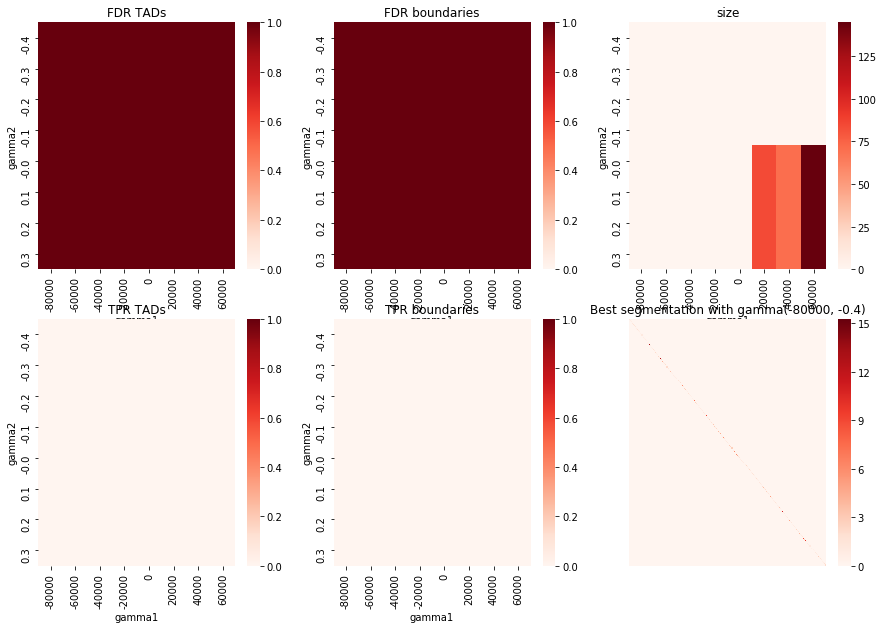

In [259]:
exp3.call()

In [36]:
exp4 = Experiment(['S2_rep1', 'S2_rep2'], ['../data/S2.20000.cool', '../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L', callername='lavamodularity', optimization='convergence', track_file='../data/repr_segmentation.txt')

In [37]:
exp4.call()

[[-7.5, -7.0, -6.5, -6.0, -5.5, -5.0, -4.5, -4.0]]

In [254]:
exp5 = Experiment(['S2_rep1', 'S2_rep2'], ['../data/S2.20000.cool', '../data/S2.20000.cool'], 'cool', assembly='dm3', resolution=20000, balance=True, chr='chr2L', callername='lavamodularity', optimization='simulated', track_file='../data/repr_segmentation.txt')

gamma    [-10.0, -9.5, -9.0, -8.5, -8.0, -7.5, -7.0, -6.5]
dtype: object (-7.5,)


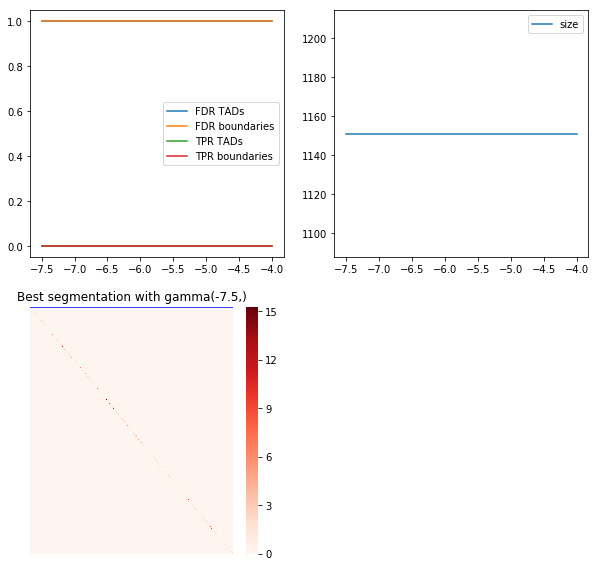

In [256]:
exp5.call()

In [263]:
a = DataClasses.GenomicRanges(np.array([[10, 20], [100, 200], [300, 400]]))
b = DataClasses.GenomicRanges(np.array([[30, 40], [210, 220], [270, 310]]))
b.find_closest(a, mode='binwise')

array([[1, 0],
       [0, 2],
       [2, 2]])